In [1]:
import sys 
sys.path.append('..')

import numpy as np
import pandas as pd
import altair as alt
from plotnine.data import mtcars,diamonds
import plotnine as gg

from ModelTools.model import CentralRegression
# diamonds.head(10)


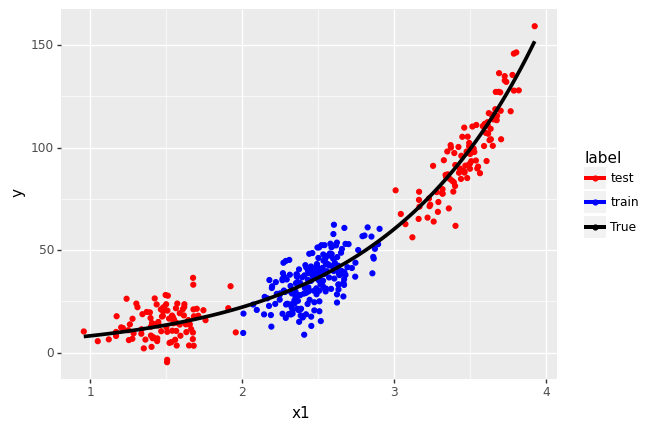

<ggplot: (379652289)>

In [60]:
def f(x): return np.exp(x)*3
rng = np.random.default_rng(1)
x1  = np.concatenate([
    rng.normal(loc=1.5,scale=0.2,size=100),
    rng.normal(loc=2.5,scale=0.2,size=200),
    rng.normal(loc=3.5,scale=0.2,size=100),
])
y   = rng.normal(loc=f(x1),scale=8)
df1 = (
    pd.DataFrame(data={'x1':x1,'y':y})
    .assign(label=lambda dt:np.where(dt.x1.between(2,3),'train','test'))
)

p1 = (
    gg.ggplot(data=df1) 
    + gg.aes(x='x1',y='y',color='label')
    + gg.geom_point()
    + gg.stat_function(gg.aes(color='"True"'),fun=lambda x:f(x),size=1.5)
    + gg.scale_color_manual(values=['red','blue','black'])
)
p1

In [61]:
mod1 = CentralRegression(
    data={'train':df1.loc[lambda dt:dt.label=='train'],
          'test':df1.loc[lambda dt:dt.label=='test']},
    col_x=['x1'],
    col_y='y'
)
mod1.fit(best_model='poly_OLS',update_param={'poly__degree':[2]},best_model_only=True)

100%|██████████| 20/20 [00:00<00:00, 32.40it/s]

Best Model(CV)   : poly_OLS (MSE) 
Hyperparameters  : poly__degree=2 
Train Test Split : test_size=0.51, shuffle=False, random_state=0 
Cross Validation : KFold(n_splits=5, random_state=None, shuffle=False) 
 
           R2       MSE      MAE      MBE    MdAE    MAPE     MaxE     SAE    SAPE
-----  ------  --------  -------  -------  ------  ------  -------  ------  ------
Train  0.4045   74.7701   7.1588   0       6.3729  0.2487  23.8307  4.85    0.2964
Test   0.9048  188.29    11.0044  -9.7207  9.6239  0.3975  42.6585  8.1972  0.3933 
 



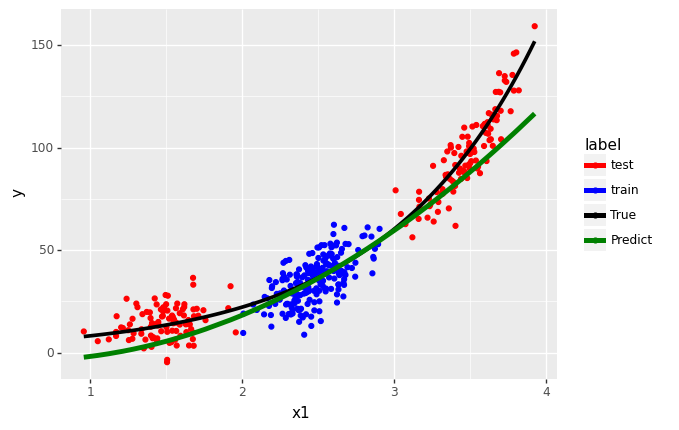

<ggplot: (379702134)>

In [62]:
p1+gg.geom_line(gg.aes(y=mod1.best_model.predict(df1.loc[:,['x1']]),color='"Predict"'),size=2)\
    + gg.scale_color_manual(values=['red','blue','black','green'])

In [63]:
mod1.check_novelty()

alt.VConcatChart(...)

In [65]:
mod1.Novelty.gmm_cv.best_params_

{'gmm__covariance_type': 'full', 'gmm__n_components': 1}

100%|██████████| 20/20 [00:00<00:00, 1191.55it/s]


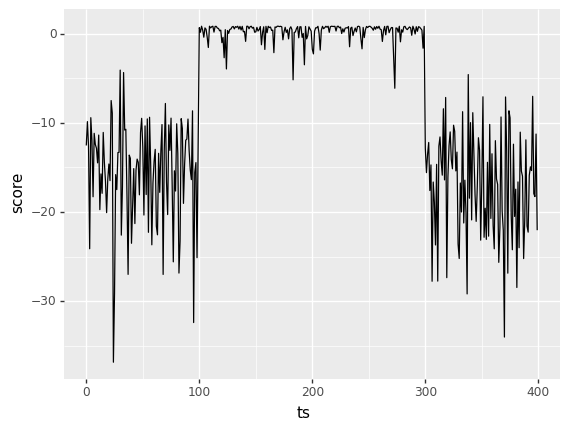

<ggplot: (377838424)>

In [76]:
mod2 = CentralRegression(
    data={'train':df1.loc[lambda dt:dt.label=='train'],
          'test':df1},
    col_x=['x1'],
    col_y='y'
)
mod2.fit(best_model='poly_OLS',update_param={'poly__degree':[2]},best_model_only=True,print_result=False)

(
    df1
    .assign(score=mod2.check_novelty(return_score=True),
            ts= lambda dt:np.arange(len(dt)))
    .pipe(gg.ggplot)
    + gg.aes(x='ts',y='score')
    + gg.geom_line()
)